**Linear Regression Exercise:**
Predict Weather in Szeged: LR, MLR, PR, DT, RF, CV

**Predict Weather in Szeged using Linear Regression, Polynomial Regression, Decision Tree, Random Forest with Cross Validation, then apply Grid Search CV, and Random Search CV and find the best parameters and estimators. Finally, acheive 99.99% accuracy.**

# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

# ML Projects Check list:  

1. Frame the problem and look at the big picture.  
2. Get the data.  
3. Explore the data to gain insights.  
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.  
5. Explore many different models and short-list the best ones.  
6. Fine-tune your models and combine them into a great solution.  
7. Present your solution.  
8. Launch, monitor, and maintain your system.

## Frame the problem

We want to explore the correlation between weather parameters. We will also check if there is any relationship between humidity and temperature as well as humidity and apparent temperature and try to predict apparent temperature using the most important features. Finally we will calculate the accuracy of our model. 

# Get Data

In [2]:
df = pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## Explore the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


We can observe there are total 12 columns where 8 columns are numerical and 4 are object type. In total, 96453 rows of data are available.  

In [4]:
df.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,96453,96453,95936,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453
unique,96429,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 06:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,NaN
std,NaN,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN
50%,NaN,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,NaN


## Observations
- Attributes have very different scales
- There are some null values in **Precip Types** column
- **Formatted Date** column has some duplicate date, we can not have two records at the same time
- All the values in **Loud Cover** column are zero, thus we can drop this column

# Prepare the Data

## Drop Duplicate Values

In [5]:
df = df.drop_duplicates(['Formatted Date'], keep='first')
print(df.shape)

(96429, 12)


As we drop some rows from the dataset, some indexes are missing now. That is why, we sort the data by **Formatted Date** and reset the indexes.

In [6]:
df.sort_values(by=['Formatted Date'], inplace=True)
df.reset_index(inplace=True, drop=True)

In [7]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-01-01 00:00:00.000 +0100,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66,Mostly cloudy throughout the day.
1,2006-01-01 01:00:00.000 +0100,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15,Mostly cloudy throughout the day.
2,2006-01-01 02:00:00.000 +0100,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87,Mostly cloudy throughout the day.
3,2006-01-01 03:00:00.000 +0100,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56,Mostly cloudy throughout the day.
4,2006-01-01 04:00:00.000 +0100,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98,Mostly cloudy throughout the day.


## Drop Unnecessary Column 

In [8]:
# We dont need 'Loud Cover' column, because it contains only zero
df = df.drop(columns=['Formatted Date', 'Loud Cover'])
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,1016.66,Mostly cloudy throughout the day.
1,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,1016.15,Mostly cloudy throughout the day.
2,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,1015.87,Mostly cloudy throughout the day.
3,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,1015.56,Mostly cloudy throughout the day.
4,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,1014.98,Mostly cloudy throughout the day.


## Handling Missing Values

In [9]:
df.isnull().sum(axis=0)

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [10]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

Here, in **Precip Type** coulmn we can observe 517 null values. As we can not predict whether the value is **rain** or **snow**, it's better to drop all the rows having null values.

In [11]:
df = df[df['Precip Type'].notna()]
print(df.shape)

(95912, 10)


## Checking Outliers

To check the outliers, we are going to draw boxplots diagram for each of the numeric column.

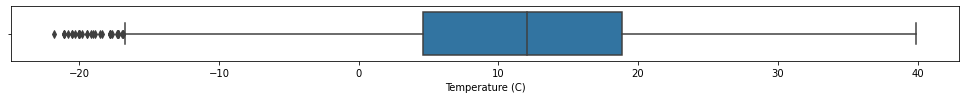

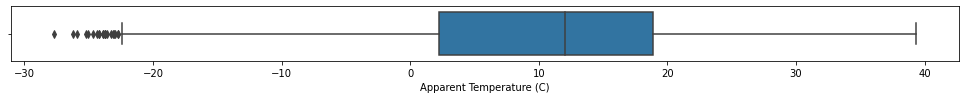

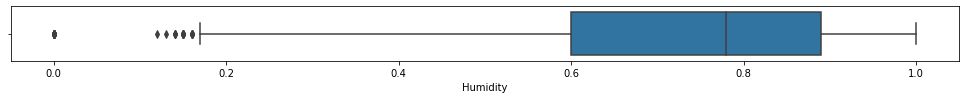

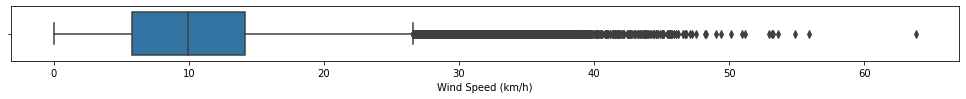

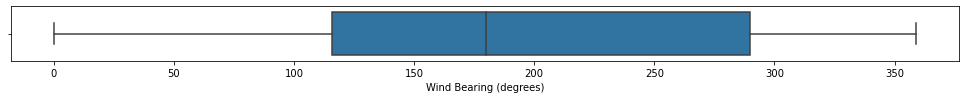

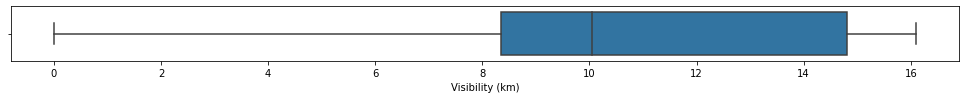

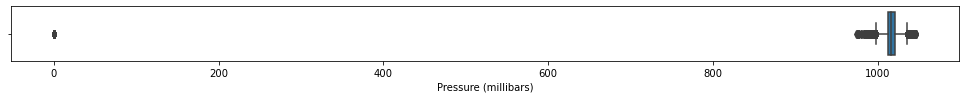

In [12]:
df1=df.select_dtypes(exclude=['object'])

for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)

We can observe outliers in **Humidity**, and **Pressure** columns. In **Wind Speed** column we can see some values which are more than 60 km/h (not sure whether it can be outlier or not :/ )

We are dropping those rows where the value of **Humidity** and **Pressure** is equals to zero. 

In [13]:
df = df[df['Humidity'] != 0.0]
df = df[df['Pressure (millibars)'] != 0]
df.reset_index(inplace=True, drop=True)
print(df.shape)

(94602, 10)


## Looking for correlateions

In [14]:
corr_matrix = df.corr()
corr_matrix["Apparent Temperature (C)"].sort_values(ascending=False)

Apparent Temperature (C)    1.000000
Temperature (C)             0.992657
Visibility (km)             0.381814
Wind Bearing (degrees)      0.029409
Wind Speed (km/h)          -0.055726
Pressure (millibars)       -0.287609
Humidity                   -0.607162
Name: Apparent Temperature (C), dtype: float64

## Create a Test Set

We will apply Stratified Shuffle Split here. This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.

In [15]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,1016.66,Mostly cloudy throughout the day.
1,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,1016.15,Mostly cloudy throughout the day.
2,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,1015.87,Mostly cloudy throughout the day.
3,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,1015.56,Mostly cloudy throughout the day.
4,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,1014.98,Mostly cloudy throughout the day.


<AxesSubplot:>

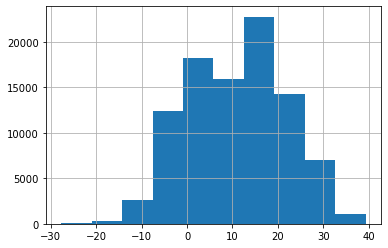

In [16]:
df["Apparent Temperature (C)"].hist()

In [17]:
df["temp_cat"] = pd.cut(df["Apparent Temperature (C)"],
                               bins=[-np.inf, 0, 10, 20, np.inf],
                               labels=[1, 2, 3, 4])

In [18]:
df["temp_cat"].value_counts()

3    32676
2    24051
4    20128
1    17747
Name: temp_cat, dtype: int64

<AxesSubplot:>

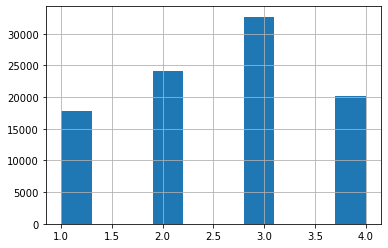

In [19]:
df["temp_cat"].hist()

In [20]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["temp_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [21]:
strat_test_set["temp_cat"].value_counts() / len(strat_test_set)

3    0.345383
2    0.254215
4    0.212779
1    0.187622
Name: temp_cat, dtype: float64

In [22]:
df["temp_cat"].value_counts() / len(df)

3    0.345405
2    0.254234
4    0.212765
1    0.187596
Name: temp_cat, dtype: float64

In [23]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("temp_cat", axis=1, inplace=True)

In [24]:
strat_train_set.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
16265,Mostly Cloudy,rain,12.361111,12.361111,0.66,4.6046,190.0,8.0500,1020.99,Foggy starting in the evening.
13080,Partly Cloudy,rain,12.827778,12.827778,0.85,6.1985,323.0,14.9569,1013.11,Mostly cloudy until night.
25046,Clear,snow,-1.661111,-4.083333,0.88,6.4078,132.0,6.2951,1027.80,Mostly cloudy starting overnight continuing un...
39049,Partly Cloudy,rain,27.200000,28.316667,0.60,12.3970,353.0,11.2056,1018.02,Partly cloudy starting in the morning continui...
42429,Foggy,rain,0.900000,0.900000,0.99,1.6744,144.0,1.8032,1008.41,Partly cloudy throughout the day.


In [25]:
df_train = strat_train_set.drop("Apparent Temperature (C)", axis=1) # drop labels for training set
df_train_labels = strat_train_set["Apparent Temperature (C)"].copy()

# Visualize the Data

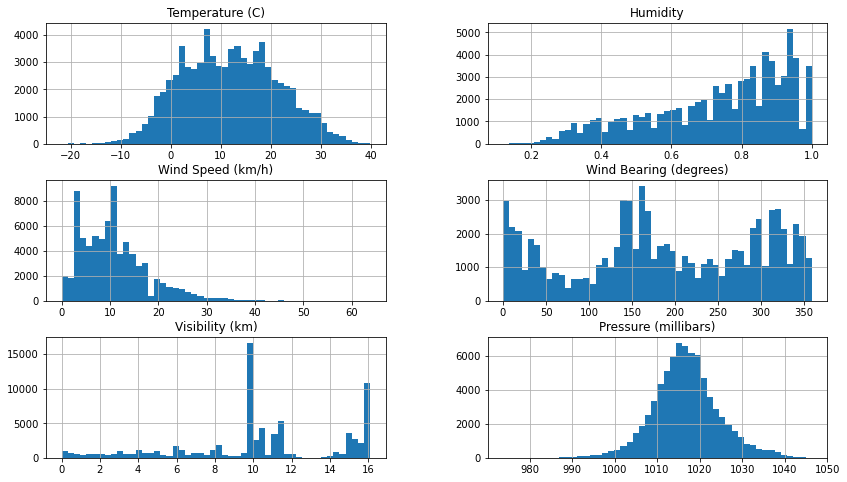

In [26]:
df_train.hist(bins=50, figsize=(14,8))
plt.show()

We can observe that **Humidity** is left skewed and **Wind Speed** is right skewed data

In [27]:
# Scatter plot

# Data Transformation

In [28]:
df_train.shape

(75681, 9)

- https://heartbeat.comet.ml/hands-on-with-feature-engineering-techniques-transforming-variables-acea03472e24

**Square root transformation:** It is used for reducing right-skewed distributions. Advantage of square root transformation is that you can apply it to zero values. This function is defined only for positive numbers. As for **Wind Speed**, we found right skewed distributions, we are going to apply square root transformation for this column.

**Exponential or Power transformation:** Power transformation has a reasonable effect on distribution shape; generally, we apply power transformation (power of two usually) to reduce left skewness. That is why, we are going to apply this transformation on **Humidity** column.

We can apply above transformation for these two columns, following is the code for that (commented out). 

But, we will apply Standard scaler for all the features here and observe how it works :)

In [29]:
# squre root transformation for 'Wind Speed'

# create the function transformer object with square root transformation
# sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)

# apply the transformation to your data
# data_new = sqrt_transformer.transform(df_train[["Wind Speed (km/h)"]])
# df_train['Wind Speed transformed'] = data_new


# power transformation with power of 2 for 'Humidity'

# create the function transformer object with cubic root transformation
# sqrt_transformer = FunctionTransformer(lambda x: x**3, validate=True)

# apply the transformation to your data
# data_new = sqrt_transformer.transform(df_train[["Humidity"]])
# df_train['Humidity transformed'] = data_new


## Handling Text and Categorical Attributes

In [30]:
df_train["Precip Type"].value_counts()

rain    67269
snow     8412
Name: Precip Type, dtype: int64

In [31]:
df_train["Summary"].nunique()

25

In [32]:
df_train["Daily Summary"].nunique()

214

‘Precip Type’ had two unique values as rain and snow, which has been encoded to 0 and 1. ‘Summary’ column had 26 unique values, which has been converted to 25 additional rows are added after performing one-hot encoding. ‘Daily Summary’ column had 214 unique values, which has been converted to 214 additional rows are added after performing one-hot encoding.

We will also check the model accuracy by removing **Summary** and **Daily Summary** variables and observe how it works

## Transformation Pipelines

Now let's build a pipeline for preprocessing the numerical attributes:

In [33]:
df_train_num = df_train.select_dtypes(include=[np.number])
df_train_num.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
16265,12.361111,0.66,4.6046,190.0,8.0500,1020.99
13080,12.827778,0.85,6.1985,323.0,14.9569,1013.11
25046,-1.661111,0.88,6.4078,132.0,6.2951,1027.80
39049,27.200000,0.60,12.3970,353.0,11.2056,1018.02
42429,0.900000,0.99,1.6744,144.0,1.8032,1008.41


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder


num_attribs = list(df_train_num)
cat_attribs = ["Precip Type", "Summary", "Daily Summary"]


num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OrdinalEncoder(), cat_attribs),
    ])

df_train_prepared = full_pipeline.fit_transform(df_train)
df_train_prepared.shape

(75681, 9)

In [35]:
df_train_prepared

array([[ 4.18134181e-02, -3.83886779e-01, -8.93944600e-01, ...,
         0.00000000e+00,  1.60000000e+01,  4.30000000e+01],
       [ 9.06247357e-02,  5.88091266e-01, -6.62835579e-01, ...,
         0.00000000e+00,  1.80000000e+01,  1.32000000e+02],
       [-1.42485046e+00,  7.41561484e-01, -6.32487930e-01, ...,
         1.00000000e+00,  5.00000000e+00,  9.10000000e+01],
       ...,
       [-1.55036527e+00, -1.20239461e+00, -7.23530877e-01, ...,
         1.00000000e+00,  1.60000000e+01,  1.11000000e+02],
       [ 3.17829797e-01,  9.97345180e-01, -1.09470597e+00, ...,
         0.00000000e+00,  1.70000000e+01,  1.11000000e+02],
       [ 1.14449307e-01,  7.92718223e-01, -1.19742109e+00, ...,
         0.00000000e+00,  1.70000000e+01,  1.11000000e+02]])

# Explore many different models

## Training and Evaluating on the Training Set

In [36]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### Using Linear Regression

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(df_train_prepared, df_train_labels)

LinearRegression()

In [38]:
df_train_predictions = lin_reg.predict(df_train_prepared)                       
accuracy_score = lin_reg.score(df_train_prepared, df_train_labels)  
print("Linear Regression Model Accuracy Score on Train set: " + "{:.4%}".format(accuracy_score))

Linear Regression Model Accuracy Score on Train set: 99.0074%


In [39]:
lin_rmse = np.sqrt(mean_squared_error(df_train_labels, df_train_predictions))
lin_r2 = r2_score(df_train_labels, df_train_predictions)
print("RMSE Score for Train set: " +"{:.4}".format(lin_rmse))
print("R2 Score for Train set: " +"{:.4}".format(lin_r2))

RMSE Score for Train set: 1.066
R2 Score for Train set: 0.9901


#### Apply Cross-Validation

In [40]:
lin_scores = cross_val_score(lin_reg, df_train_prepared, df_train_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1.05559443 1.06473674 1.06419154 1.03706288 1.07763045 1.07612606
 1.06313381 1.07976215 1.07367518 1.070103  ]
Mean: 1.0662016240506227
Standard deviation: 0.012088225270003463


### Using Polynomial Regression

In [41]:
poly_reg = PolynomialFeatures(degree = 5)
poly_transform = poly_reg.fit_transform(df_train_prepared)

lin_reg2 = LinearRegression()
lin_reg2.fit(poly_transform, df_train_labels)

LinearRegression()

In [42]:
df_train_predictions = lin_reg2.predict(poly_transform) 
rmse = np.sqrt(mean_squared_error(df_train_labels, df_train_predictions))
r2 = r2_score(df_train_labels, df_train_predictions)
print("RMSE Score for Train set: " +"{:.4}".format(rmse))
print("R2 Score for Train set: " +"{:.4}".format(r2))

RMSE Score for Train set: 0.3473
R2 Score for Train set: 0.9989


#### Apply Cross-Validation

In [43]:
lin2_scores = cross_val_score(lin_reg2, df_train_prepared, df_train_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin2_rmse_scores = np.sqrt(-lin2_scores)
display_scores(lin2_rmse_scores)

Scores: [1.05559443 1.06473674 1.06419154 1.03706288 1.07763045 1.07612606
 1.06313381 1.07976215 1.07367518 1.070103  ]
Mean: 1.0662016240506227
Standard deviation: 0.012088225270003463


### Using Decision Tree Regressor

In [44]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(df_train_prepared, df_train_labels)

DecisionTreeRegressor(random_state=42)

In [45]:
df_train_predictions = tree_reg.predict(df_train_prepared)
rmse = np.sqrt(mean_squared_error(df_train_labels, df_train_predictions))
r2 = r2_score(df_train_labels, df_train_predictions)
print("RMSE Score for Train set: " +"{:.4}".format(rmse))
print("R2 Score for Train set: " +"{:.4}".format(r2))

RMSE Score for Train set: 8.6e-15
R2 Score for Train set: 1.0


#### Apply Cross-Validation

In [46]:
scores = cross_val_score(tree_reg, df_train_prepared, df_train_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [0.10267459 0.08779454 0.10531022 0.10080462 0.09474823 0.10042688
 0.09008456 0.08980767 0.11110124 0.10809146]
Mean: 0.09908439990949838
Standard deviation: 0.0077153181298803015


### Using Random Forest Regressor

In [47]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(df_train_prepared, df_train_labels)

RandomForestRegressor(random_state=42)

In [48]:
df_train_predictions = forest_reg.predict(df_train_prepared)
rmse = np.sqrt(mean_squared_error(df_train_labels, df_train_predictions))
r2 = r2_score(df_train_labels, df_train_predictions)
print("RMSE Score for Train set: " +"{:.4}".format(rmse))
print("R2 Score for Train set: " +"{:.4}".format(r2))

RMSE Score for Train set: 0.02487
R2 Score for Train set: 1.0


#### Apply Cross-Validation

In [49]:
forest_scores = cross_val_score(forest_reg, df_train_prepared, df_train_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.07876328 0.05383826 0.06993747 0.07150737 0.05751917 0.07040286
 0.0519545  0.06570287 0.07297733 0.07671683]
Mean: 0.06693199403097885
Standard deviation: 0.008945196527331785


In [50]:
scores = cross_val_score(lin_reg, df_train_prepared, df_train_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      1.066202
std       0.012742
min       1.037063
25%       1.063398
50%       1.067420
75%       1.075513
max       1.079762
dtype: float64

## Fine-tune the models

### Grid Search

In [51]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(df_train_prepared, df_train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameter combination found:

In [52]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [53]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [54]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.3493400747156064 {'max_features': 2, 'n_estimators': 3}
0.8365689490006991 {'max_features': 2, 'n_estimators': 10}
0.6337615295009298 {'max_features': 2, 'n_estimators': 30}
0.47522549045120915 {'max_features': 4, 'n_estimators': 3}
0.26656063249650314 {'max_features': 4, 'n_estimators': 10}
0.18945538112248247 {'max_features': 4, 'n_estimators': 30}
0.13247245123726478 {'max_features': 6, 'n_estimators': 3}
0.11036090693596608 {'max_features': 6, 'n_estimators': 10}
0.08936346642984355 {'max_features': 6, 'n_estimators': 30}
0.09481110369740253 {'max_features': 8, 'n_estimators': 3}
0.0790551307547269 {'max_features': 8, 'n_estimators': 10}
0.07155239544171056 {'max_features': 8, 'n_estimators': 30}
1.1545829936591683 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.7309596259895071 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.6410968933675254 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.3962917901197245 {'bootstrap': False, 'max_features

### Randomized Search

In [55]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(df_train_prepared, df_train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EB40112910>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EB3FFE7BE0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [56]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.0720209697619394 {'max_features': 7, 'n_estimators': 180}
0.14420523040358857 {'max_features': 5, 'n_estimators': 15}
0.28909166268142156 {'max_features': 3, 'n_estimators': 72}
0.13089645011318782 {'max_features': 5, 'n_estimators': 21}
0.07196045971144051 {'max_features': 7, 'n_estimators': 122}
0.2872396194880723 {'max_features': 3, 'n_estimators': 75}
0.28079170792340036 {'max_features': 3, 'n_estimators': 88}
0.10351435426218712 {'max_features': 5, 'n_estimators': 100}
0.26713921588282835 {'max_features': 3, 'n_estimators': 150}
0.32677184340926096 {'max_features': 5, 'n_estimators': 2}


## Analyze the Best Models and Their Errors

In [57]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([9.35524063e-01, 1.12698522e-02, 9.64416970e-03, 8.61619262e-06,
       1.71748399e-05, 2.15534067e-05, 4.34871305e-02, 2.22756647e-05,
       5.16483313e-06])

In [58]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.9355240627483095, 'Temperature (C)'),
 (0.043487130454511004, 'rain'),
 (0.011269852162856921, 'Humidity'),
 (0.00964416969727931, 'Wind Speed (km/h)'),
 (2.2275664662783385e-05, 'snow'),
 (2.1553406727057296e-05, 'Pressure (millibars)'),
 (1.717483990982125e-05, 'Visibility (km)'),
 (8.616192617127775e-06, 'Wind Bearing (degrees)')]

## Evaluate The System on the Test Set

How to Evaluate the Accuracy of Regression Results?
- https://medium.com/@amanbamrah/how-to-evaluate-the-accuracy-of-regression-results-b38e5512afd3

In [59]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("Apparent Temperature (C)", axis=1)
y_test = strat_test_set["Apparent Temperature (C)"].copy()

In [60]:
X_test

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
62922,Partly Cloudy,rain,22.277778,0.41,19.3522,25.0,10.3523,1016.65,Partly cloudy starting in the morning continui...
84378,Overcast,rain,11.133333,0.93,19.8030,160.0,4.5241,1018.19,Foggy starting in the evening.
11160,Partly Cloudy,rain,10.016667,0.38,14.2968,29.0,10.3523,1020.76,Partly cloudy starting in the morning.
16692,Foggy,rain,5.033333,0.94,10.0786,58.0,2.8980,1020.04,Foggy in the morning.
79885,Clear,rain,7.688889,0.52,10.7709,140.0,16.1000,1025.09,Partly cloudy starting in the morning.
...,...,...,...,...,...,...,...,...,...
32373,Mostly Cloudy,rain,17.777778,0.46,22.5400,330.0,9.9820,1015.00,Mostly cloudy until night.
26445,Foggy,snow,-2.222222,1.00,4.8300,20.0,0.1610,997.40,Foggy starting overnight continuing until afte...
79610,Mostly Cloudy,rain,13.905556,0.67,29.7367,195.0,15.5526,1000.61,Mostly cloudy throughout the day.
87348,Partly Cloudy,rain,7.777778,0.89,10.8514,129.0,15.3755,1021.13,Mostly cloudy throughout the day.


In [61]:
X_test_num = X_test.select_dtypes(include=[np.number])
X_test_num.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
62922,22.277778,0.41,19.3522,25.0,10.3523,1016.65
84378,11.133333,0.93,19.8030,160.0,4.5241,1018.19
11160,10.016667,0.38,14.2968,29.0,10.3523,1020.76
16692,5.033333,0.94,10.0786,58.0,2.8980,1020.04
79885,7.688889,0.52,10.7709,140.0,16.1000,1025.09


In [62]:
num_attribs = list(X_test_num)
cat_attribs = ["Precip Type", "Summary", "Daily Summary"]

X_test_prepared = full_pipeline.fit_transform(X_test)

In [63]:
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [64]:
final_rmse

0.08061090003232285

Checking whether the model is overfitting or not

In [65]:
print(f"training score--->{final_model.score(df_train_prepared,df_train_labels)}")
print(f"testing score--->{final_model.score(X_test_prepared,y_test)}")

training score--->0.9999940754815181
testing score--->0.9999431318296209


**No overfitting!!!!**

## Present the solution

Copy the actual values, predicted values, and their differences into one data frame

In [66]:
## final_predictions = y_hat
test_df =pd.DataFrame({
              'actual':y_test,
              'prediction':final_predictions,
              'diff':(y_test-final_predictions)})
test_df.head(10)

,actual,prediction,diff
62922,22.277778,22.297963,-2.018519e-02
84378,11.133333,11.133889,-5.555556e-04
11160,10.016667,10.016852,-1.851852e-04
16692,2.694444,2.696667,-2.222222e-03
79885,5.738889,5.766852,-2.796296e-02
43515,10.072222,10.072222,-3.552714e-15
58449,15.044444,15.055370,-1.092593e-02
18754,6.572222,6.565741,6.481481e-03
90943,13.033333,13.037037,-3.703704e-03
70625,6.622222,6.616111,6.111111e-03


We can see from above data frame, the row indexes may not in the order so we can reset the index by following below code to avoid problems in future,

In [67]:
test_df=test_df.reset_index(drop=True)
test_df.head(10) # For Verification After reset the index we can see that its start from zero

,actual,prediction,diff
0,22.277778,22.297963,-2.018519e-02
1,11.133333,11.133889,-5.555556e-04
2,10.016667,10.016852,-1.851852e-04
3,2.694444,2.696667,-2.222222e-03
4,5.738889,5.766852,-2.796296e-02
5,10.072222,10.072222,-3.552714e-15
6,15.044444,15.055370,-1.092593e-02
7,6.572222,6.565741,6.481481e-03
8,13.033333,13.037037,-3.703704e-03
9,6.622222,6.616111,6.111111e-03


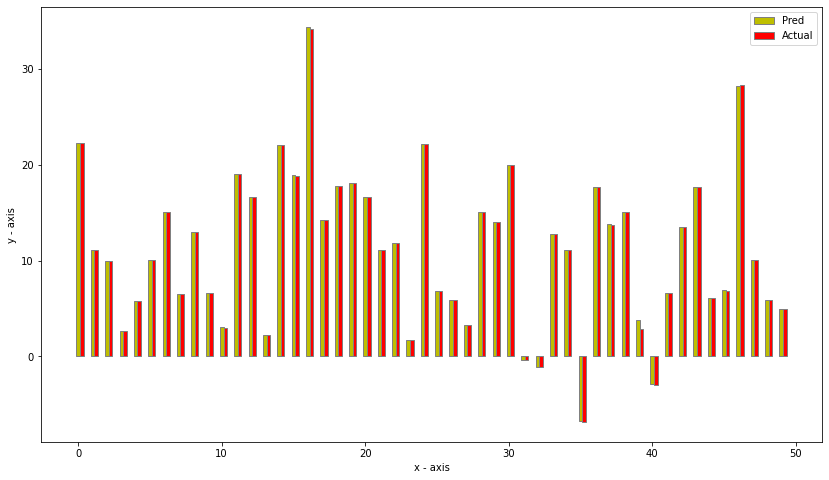

In [68]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(14, 8))
 
# Set position of bar on X axis
br1 = np.arange(len(test_df['prediction'][:50]))
br2 = [x + barWidth for x in br1]

# Make the plot
# Load the 50 data points from prediction with label name 'Pred' 
plt.bar(br1, test_df['prediction'][:50], color ='y', width = barWidth,
        edgecolor ='grey', label ='Pred')

# Load the 50 data points from actual with label name 'Actual' 
plt.bar(br2, test_df['actual'][:50], color ='r', width = barWidth,
        edgecolor ='grey', label ='Actual')

# Adding Xticks
plt.xlabel('x - axis')
plt.ylabel('y - axis')

plt.legend()
plt.show()

Calculate the Percentage of explained variance of the predictions

In [69]:
print(final_model.score(X_test_prepared,y_test))

0.9999431318296209


Calculate the Cross-Predicted Accuracy of the model

In [70]:
accuracy = metrics.r2_score(y_test, final_predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.9999431318296209


By following below code we can create the distribution Plot to look at the distribution of the actual vs predicted values for our model.

C:\Users\Nafisa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Nafisa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Apparent Temperature (C)', ylabel='Density'>

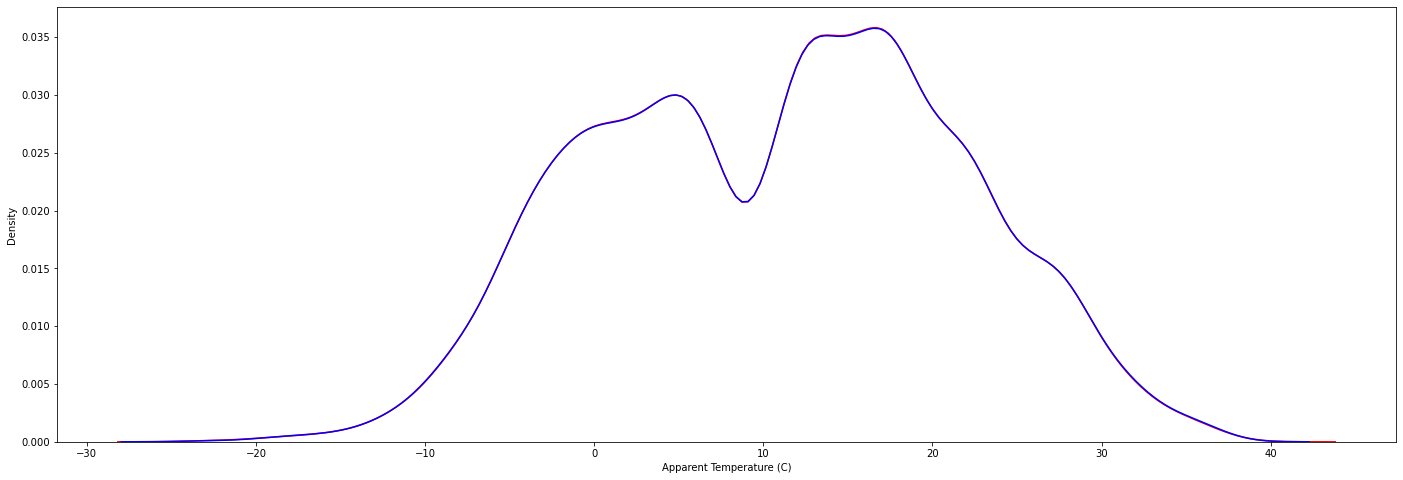

In [71]:
plt.rcParams["figure.figsize"] = (24, 8)
# ax = sns.distplot(y_test, hist=False, color ="r",label="Test")
# sns.displot(data=test_df, x="actual", kind="kde", color ="r",label="Actual")
# sns.displot(data=test_df, x="prediction", kind="kde", color ="b",label="Prediction")
sns.distplot(y_test,hist=False,color ="r",label="Actual")
sns.distplot(final_predictions,hist=False,color ="b",label="Prediction")